In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('/content/sleeptime_prediction_dataset.csv')

In [3]:
data.head()

,WorkoutTime,ReadingTime,PhoneTime,WorkHours,CaffeineIntake,RelaxationTime,SleepTime,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,1.12,0.52,3.29,7.89,216.08,0.75,3.45,NaN,Basic Statistics,NaN,NaN,NaN,NaN,NaN,NaN
1,2.85,0.49,4.22,5.03,206.18,0.67,4.88,NaN,Activity,Count,Sum,Average/Mean,SD,Min,Max
2,2.20,1.81,4.04,9.23,28.73,0.35,3.61,NaN,WorkoutTime,2000,2991.83,1.495915,0.876639499,0.01,3
3,1.80,0.50,1.62,7.68,276.77,1.21,4.94,NaN,ReadingTime,2000,1985.57,0.992785,0.577302635,0,2
4,0.47,0.54,1.60,4.94,170.54,0.95,5.50,NaN,PhoneTime,2000,5970.39,2.985195,1.151776131,1,5


In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   WorkoutTime     2000 non-null   float64
 1   ReadingTime     2000 non-null   float64
 2   PhoneTime       2000 non-null   float64
 3   WorkHours       2000 non-null   float64
 4   CaffeineIntake  2000 non-null   float64
 5   RelaxationTime  2000 non-null   float64
 6   SleepTime       2000 non-null   float64
 7   Unnamed: 7      0 non-null      float64
 8   Unnamed: 8      17 non-null     object 
 9   Unnamed: 9      15 non-null     object 
 10  Unnamed: 10     8 non-null      object 
 11  Unnamed: 11     8 non-null      object 
 12  Unnamed: 12     8 non-null      object 
 13  Unnamed: 13     8 non-null      object 
 14  Unnamed: 14     8 non-null      object 
dtypes: float64(8), object(7)
memory usage: 234.5+ KB
None


In [5]:
print(data.describe())

       WorkoutTime  ReadingTime    PhoneTime    WorkHours  CaffeineIntake  \
count  2000.000000  2000.000000  2000.000000  2000.000000     2000.000000   
mean      1.495915     0.992785     2.985195     6.926945      147.493780   
std       0.876639     0.577303     1.151776     1.723843       84.651139   
min       0.010000     0.000000     1.000000     4.000000        0.020000   
25%       0.710000     0.500000     1.990000     5.440000       75.980000   
50%       1.520000     0.990000     2.965000     6.910000      146.010000   
75%       2.250000     1.500000     3.960000     8.422500      218.902500   
max       3.000000     2.000000     5.000000    10.000000      299.850000   

       RelaxationTime    SleepTime  Unnamed: 7  
count     2000.000000  2000.000000         0.0  
mean         1.010955     4.884375         NaN  
std          0.582619     2.028892         NaN  
min          0.000000     0.150000         NaN  
25%          0.510000     3.840000         NaN  
50%         

Correlation Matrix

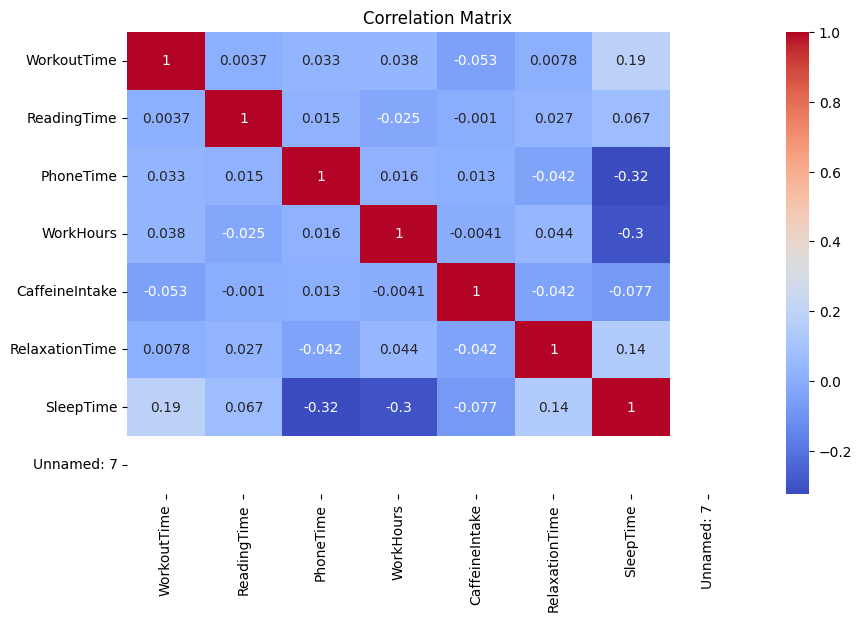

In [12]:
plt.figure(figsize=(10, 6))
numeric_data = data.select_dtypes(include=['number'])
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


Dsitribution of sleeptime

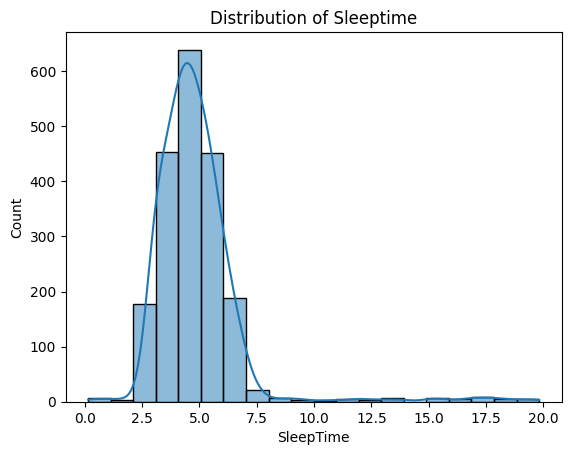

In [8]:
sns.histplot(data['SleepTime'],kde=True,bins=20)
plt.title('Distribution of Sleeptime')
plt.show()

Impact of each activity of sleeptime

In [13]:
melted_data=data.melt(
    id_vars=['SleepTime'],
    value_vars=['WorkoutTime', 'ReadingTime', 'PhoneTime','WorkHours','CaffeineIntake','RelaxationTime'],
    var_name='Activity',
    value_name='TimeSpent'
)

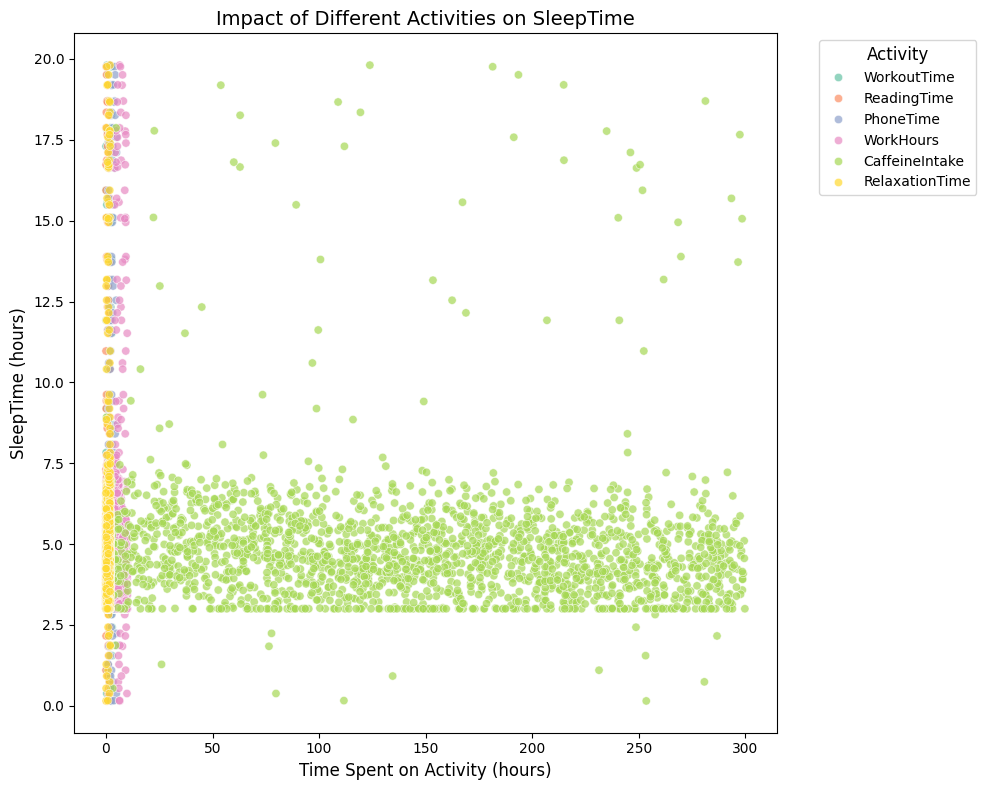

In [15]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='TimeSpent',y='SleepTime', hue='Activity', data=melted_data, palette='Set2',alpha=0.7)

plt.title('Impact of Different Activities on SleepTime', fontsize=14)
plt.xlabel('Time Spent on Activity (hours)', fontsize=12)
plt.ylabel('SleepTime (hours)', fontsize=12)
plt.legend(title='Activity', title_fontsize=12, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# **Which Activity has the strongest imapct on sleeping time: Ordinary Least Squares (OLS) Regression Analysis**



In [16]:
import statsmodels.api as sm
x=data[['WorkoutTime','ReadingTime','PhoneTime','WorkHours','CaffeineIntake','RelaxationTime']]
y=data['SleepTime']
x=sm.add_constant(x)

model=sm.OLS(y,x).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:              SleepTime   R-squared:                       0.261
Model:                            OLS   Adj. R-squared:                  0.259
Method:                 Least Squares   F-statistic:                     117.5
Date:                Thu, 02 Jan 2025   Prob (F-statistic):          2.71e-127
Time:                        06:12:31   Log-Likelihood:                -3949.4
No. Observations:                2000   AIC:                             7913.
Df Residuals:                    1993   BIC:                             7952.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              7.8462      0.231     33.

# **Categorising SleepTime as Low, Moderate, Good, Healthy**



SleepCategory
Moderate    1120
Low          598
Good         226
Healthy       10
Name: count, dtype: int64


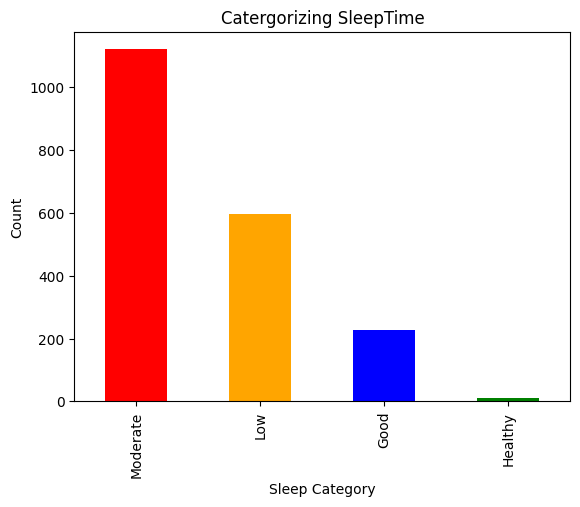

In [18]:
data['SleepTime']=pd.to_numeric(data['SleepTime'], errors='coerce')

data['SleepCategory']=pd.cut(data['SleepTime'], bins=[0,4,6,8,10], labels=['Low','Moderate','Good','Healthy'])
print(data['SleepCategory'].value_counts())

category_counts=data['SleepCategory'].value_counts()
category_counts.plot(kind='bar',color=['red','orange','blue','green'])
plt.title('Catergorizing SleepTime')
plt.xlabel('Sleep Category')
plt.ylabel('Count')
plt.show()

# Combined effect of different activities on *SleepTime* **bold text**



Combined effect of *PhoneTime* and *CaffeineIntake* on *SleepTime*
**bold text**


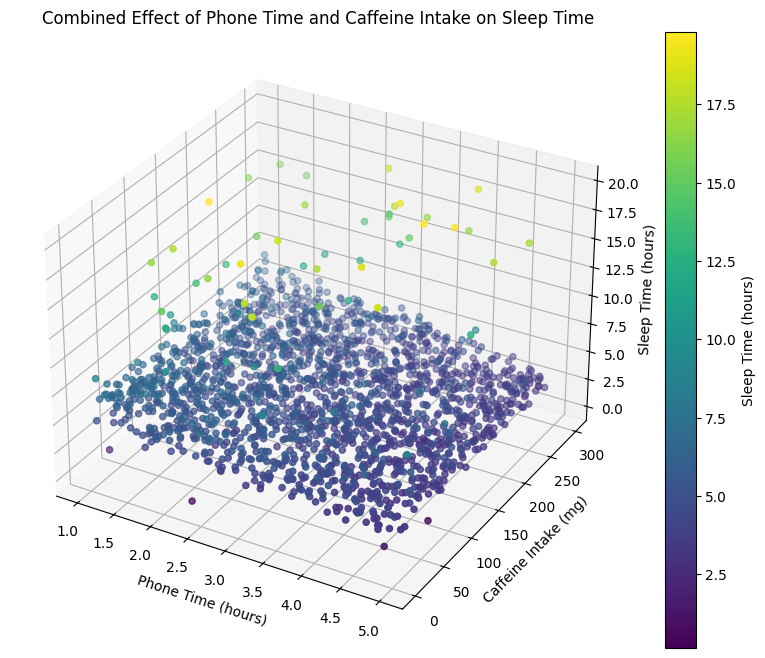

In [19]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 3D scatterplot for combined effect
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatterplot
sc = ax.scatter(data['PhoneTime'], data['CaffeineIntake'], data['SleepTime'], c=data['SleepTime'], cmap='viridis')

# Labels and title
ax.set_xlabel('Phone Time (hours)')
ax.set_ylabel('Caffeine Intake (mg)')
ax.set_zlabel('Sleep Time (hours)')
plt.title('Combined Effect of Phone Time and Caffeine Intake on Sleep Time')

# Colorbar
cbar = plt.colorbar(sc, ax=ax)
cbar.set_label('Sleep Time (hours)')

plt.show()

Combined effect of *WorkoutTime* and *RelaxationTime* on *SleepTime* **bold text**



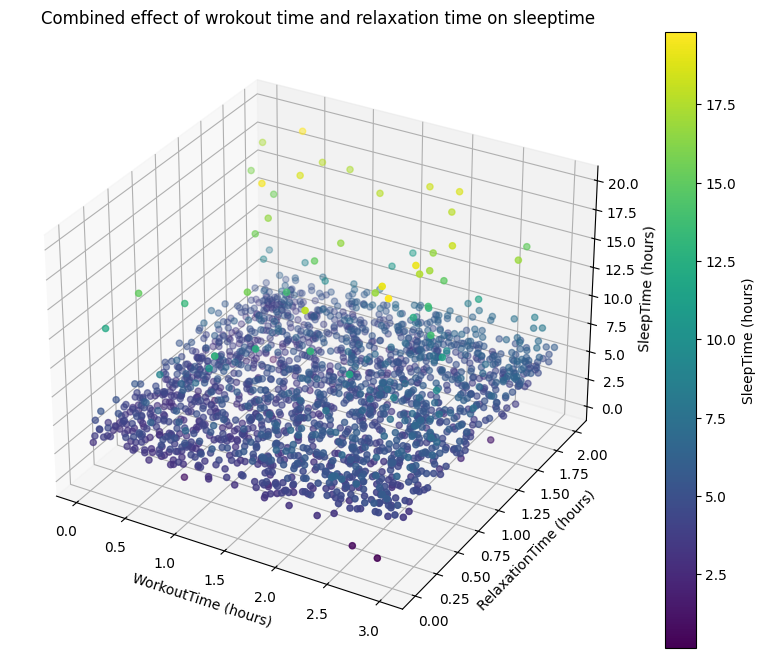

In [20]:
fig=plt.figure(figsize=(10,8))
ax=fig.add_subplot(111,projection='3d')

sc=ax.scatter(data['WorkoutTime'],data['RelaxationTime'],data['SleepTime'],c=data['SleepTime'],cmap='viridis')
ax.set_xlabel('WorkoutTime (hours)')
ax.set_ylabel('RelaxationTime (hours)')
ax.set_zlabel('SleepTime (hours)')
plt.title('Combined effect of wrokout time and relaxation time on sleeptime')
cbar=plt.colorbar(sc,ax=ax)
cbar.set_label('SleepTime (hours)')

plt.show()

**Combined effect of *RelaxationTime* and *ReadingTime* on *SleepTime***



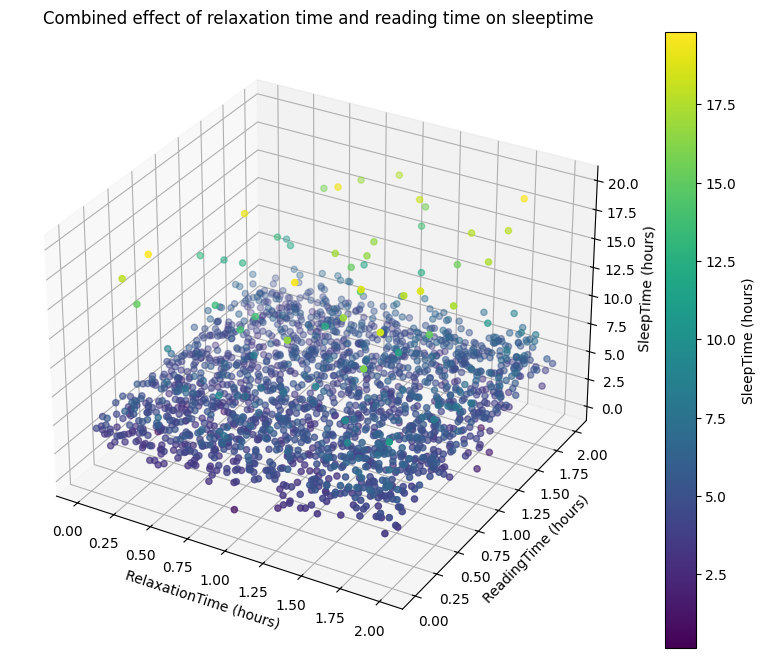

In [21]:
fig=plt.figure(figsize=(10,8))
ax=fig.add_subplot(111,projection='3d')

sc=ax.scatter(data['RelaxationTime'],data['ReadingTime'],data['SleepTime'],c=data['SleepTime'],cmap='viridis')
ax.set_xlabel('RelaxationTime (hours)')
ax.set_ylabel('ReadingTime (hours)')
ax.set_zlabel('SleepTime (hours)')
plt.title('Combined effect of relaxation time and reading time on sleeptime')
cbar=plt.colorbar(sc,ax=ax)
cbar.set_label('SleepTime (hours)')

plt.show()

**Grouping users with similar patterns: KMEans Clustering**

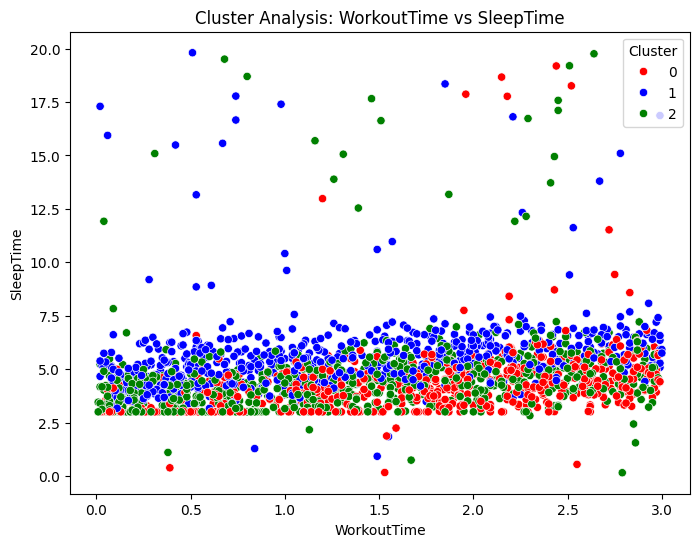

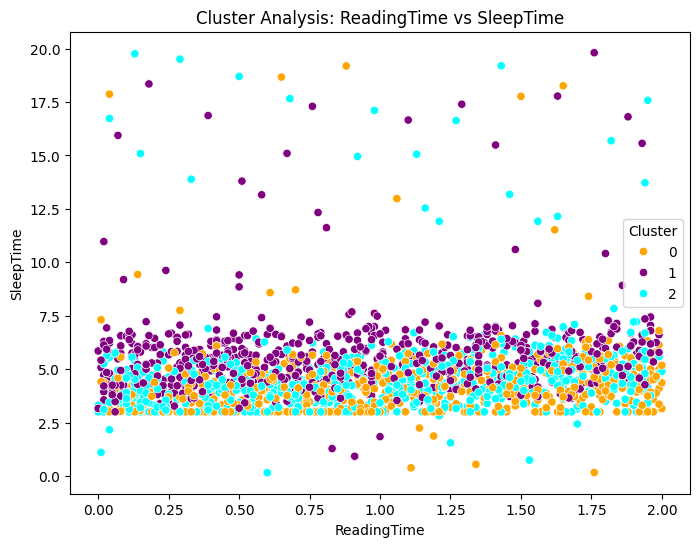

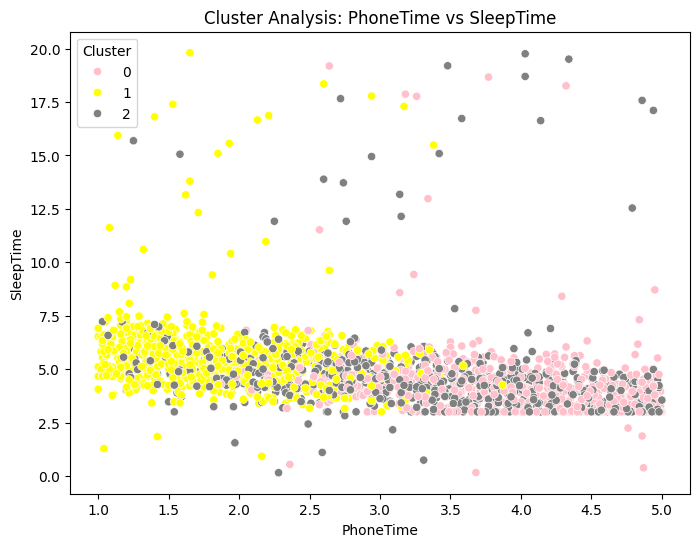

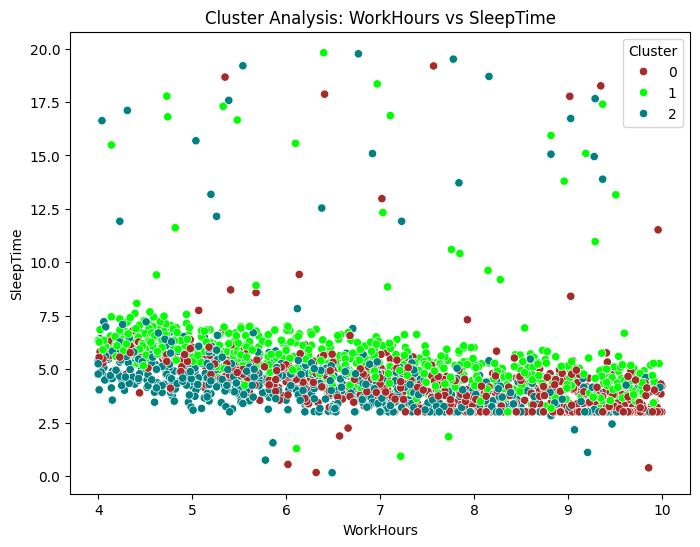

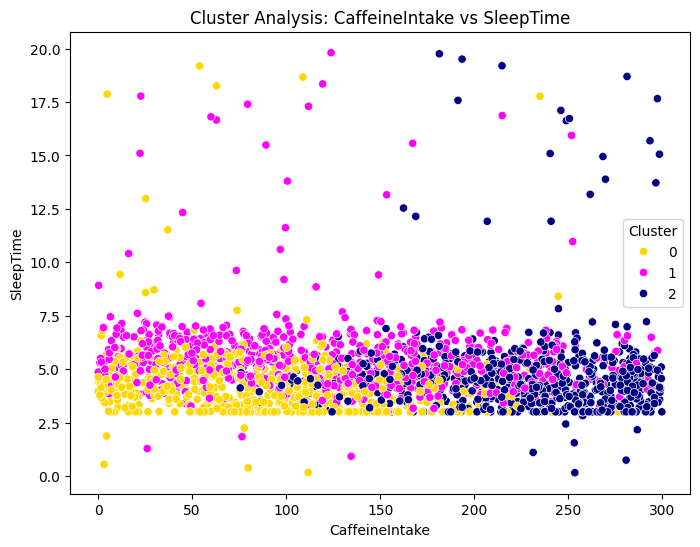

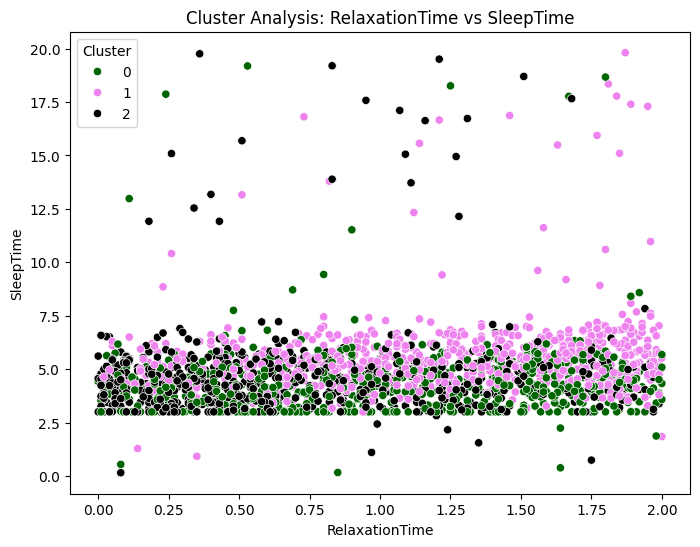

In [22]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaled_data=scaler.fit_transform(data[['WorkoutTime', 'ReadingTime','PhoneTime','WorkHours','CaffeineIntake','RelaxationTime']])

kmeans=KMeans(n_clusters=3,random_state=42)
data['Cluster']=kmeans.fit_predict(scaled_data)

variables = ['WorkoutTime', 'ReadingTime', 'PhoneTime', 'WorkHours', 'CaffeineIntake', 'RelaxationTime']
palette = ['Set1', 'Set2', 'Set3', 'Set4', 'Set5', 'Set6']

custom_palettes = [
    ['red', 'blue', 'green'],
    ['orange', 'purple', 'cyan'],
    ['pink', 'yellow', 'gray'],
    ['brown', 'lime', 'teal'],
    ['gold', 'magenta', 'navy'],
    ['darkgreen', 'violet', 'black'],
]

for i, var in enumerate(variables):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=var, y='SleepTime', hue='Cluster', data=data, palette=custom_palettes[i])
    plt.title(f'Cluster Analysis: {var} vs SleepTime')
    plt.xlabel(var)
    plt.ylabel('SleepTime')
    plt.legend(title='Cluster')
    plt.show()

# **Correlation and Statistical Tests**

T-Statistic: nan
P-Value: nan


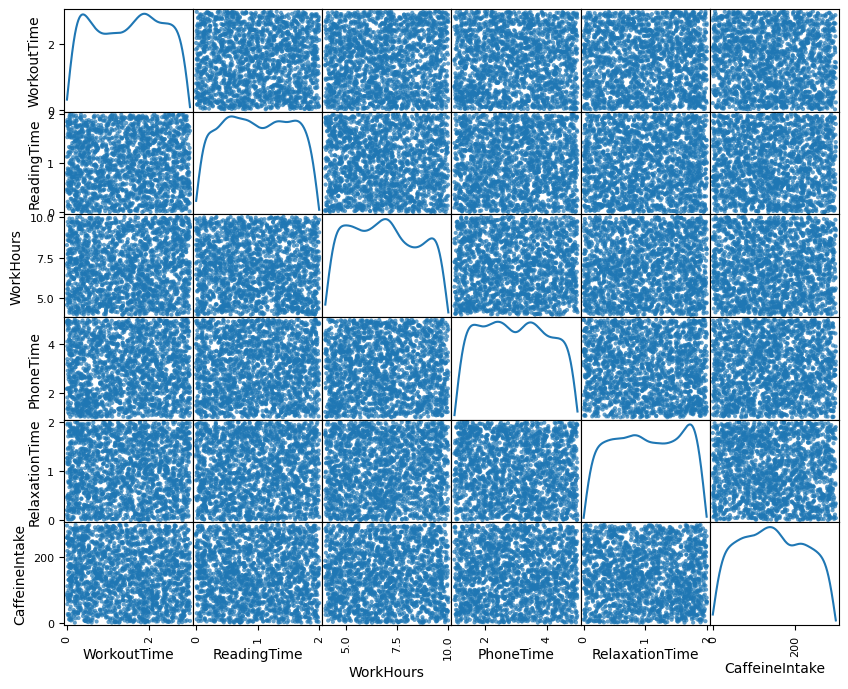

In [32]:
from scipy.stats import ttest_ind

low_caffeine=data[data['CaffeineIntake']=='Low']['SleepTime']
high_caffeine=data[data['CaffeineIntake']=='High']['SleepTime']
t_stat, p_val=ttest_ind(low_caffeine,high_caffeine)
print(f"T-Statistic: {t_stat}\nP-Value: {p_val}")

pd.plotting.scatter_matrix(data[['WorkoutTime','ReadingTime','WorkHours','PhoneTime','RelaxationTime','CaffeineIntake']], figsize=(10,8),alpha=0.7,diagonal='kde')
plt.show()

# **Time Allocation Patterns**

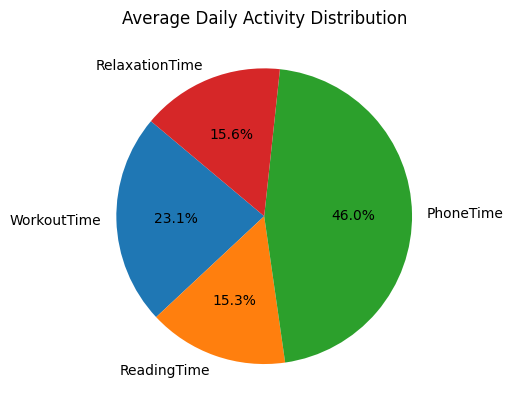

In [26]:
avg_time = data[['WorkoutTime', 'ReadingTime', 'PhoneTime', 'RelaxationTime']].mean()
avg_time.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Average Daily Activity Distribution')
plt.show()

In [28]:
# Top Contributors to Sleep Reduction: Identify habits that reduce sleep

reductions = data[['PhoneTime', 'WorkHours', 'CaffeineIntake']].corrwith(data['SleepTime'])
print(reductions.sort_values(ascending=True))

PhoneTime        -0.322506
WorkHours        -0.298469
CaffeineIntake   -0.076992
dtype: float64


# **Recommendations:**

*  Reduce phone usage before bedtime.

*   Limit caffeine consumption in the evening.

*   Prioritize workouts for better sleep.